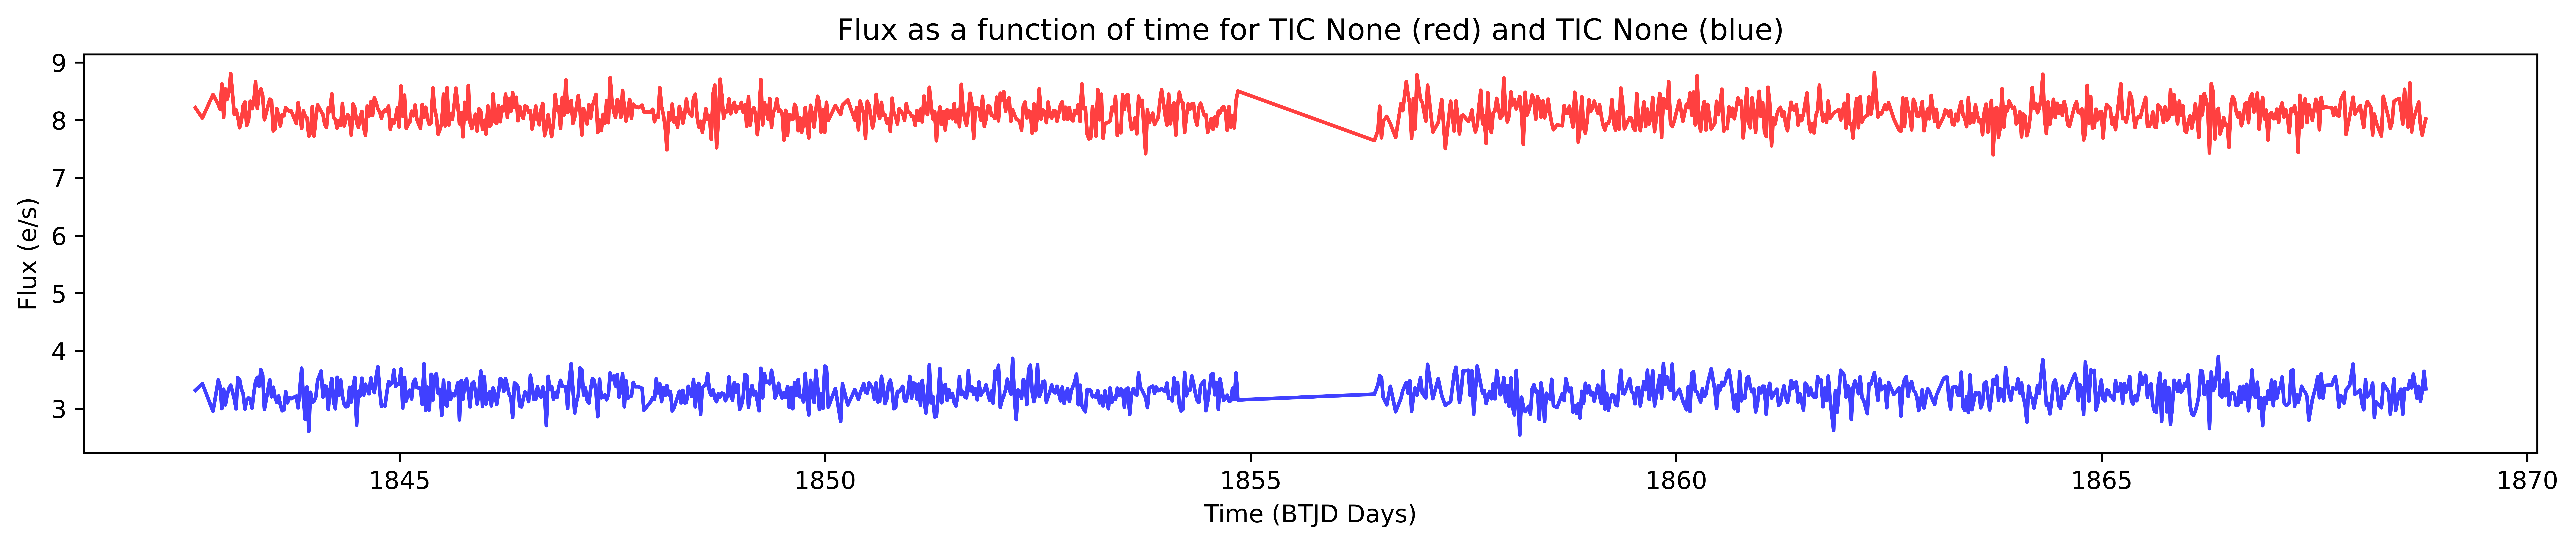

In [2]:
import lightkurve as lk
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk, Label, Entry, Button
from tkinter.ttk import Combobox

lc_dir = 'E:/lightcurves/'

def load(file='1lc.pickle',width=18,height=3,dpi=1000,alpha=0.75,bin=True,bins=2000,sigma=20,save=False):
    plt.figure(figsize=(width, height), dpi=dpi)
    with open(file,'rb') as rfile:
        lc = pickle.load(rfile)
    lc.quality = np.zeros(len(lc.flux),dtype='int')
    if bin == True:
        lc = lc.remove_nans().remove_outliers(sigma=sigma).bin(bins=bins)
    elif bin == False:
        lc = lc.remove_nans().remove_outliers(sigma=sigma)
    plt.plot(lc.time,lc.flux,color='black',alpha=alpha,label='TIC ' + str(lc.targetid))
    #plt.xlim(left=1340,right=1380)
    plt.xlabel("Time (BTJD Days)")
    plt.ylabel("Flux Deviation From Median Flux (pixel flux)")
    plt.title("Flux as a function of time for " + 'Quasar 5278')# + str(lc.targetid))
    if save == True:
        plt.savefig("5278lc.png")
   
def load2(file='1lc.pickle',file2='2lc.pickle',width=18,height=3,dpi=1000,alpha=0.75,bin=True,save=False):
    plt.figure(figsize=(width, height), dpi=dpi)
    with open(file,'rb') as rfile:
        lc = pickle.load(rfile)
    if bin == True:
        lc = lc.remove_nans().remove_outliers().bin()
    elif bin == False:
        lc = lc.remove_nans().remove_outliers()
    plt.plot(lc.time,lc.flux,color='red',alpha=alpha,label='TIC ' + str(lc.targetid))
    
    with open(file2,'rb') as rfile:
        lc1 = pickle.load(rfile)
    if bin == True:
        lc1 = lc1.remove_nans().remove_outliers().bin()
    elif bin == False:
        lc1 = lc1.remove_nans().remove_outliers(sigma=20)
    plt.plot(lc1.time,lc1.flux,color='blue',alpha=alpha,label='TIC ' + str(lc1.targetid))
    plt.xlabel("Time (BTJD Days)")
    plt.ylabel("Flux (e/s)")
    plt.title("Flux as a function of time for " + 'TIC ' + str(lc.targetid) + " (red) and " + 'TIC ' + str(lc1.targetid) + " (blue)")
    if save == True:
        plt.savefig(str(file)+".png")

load2(file=lc_dir+'blazar/full/2.pickle',file2=lc_dir+'star/full/2.pickle',width=18,height=3,dpi=1000,alpha=0.75,bin=False,save=False)

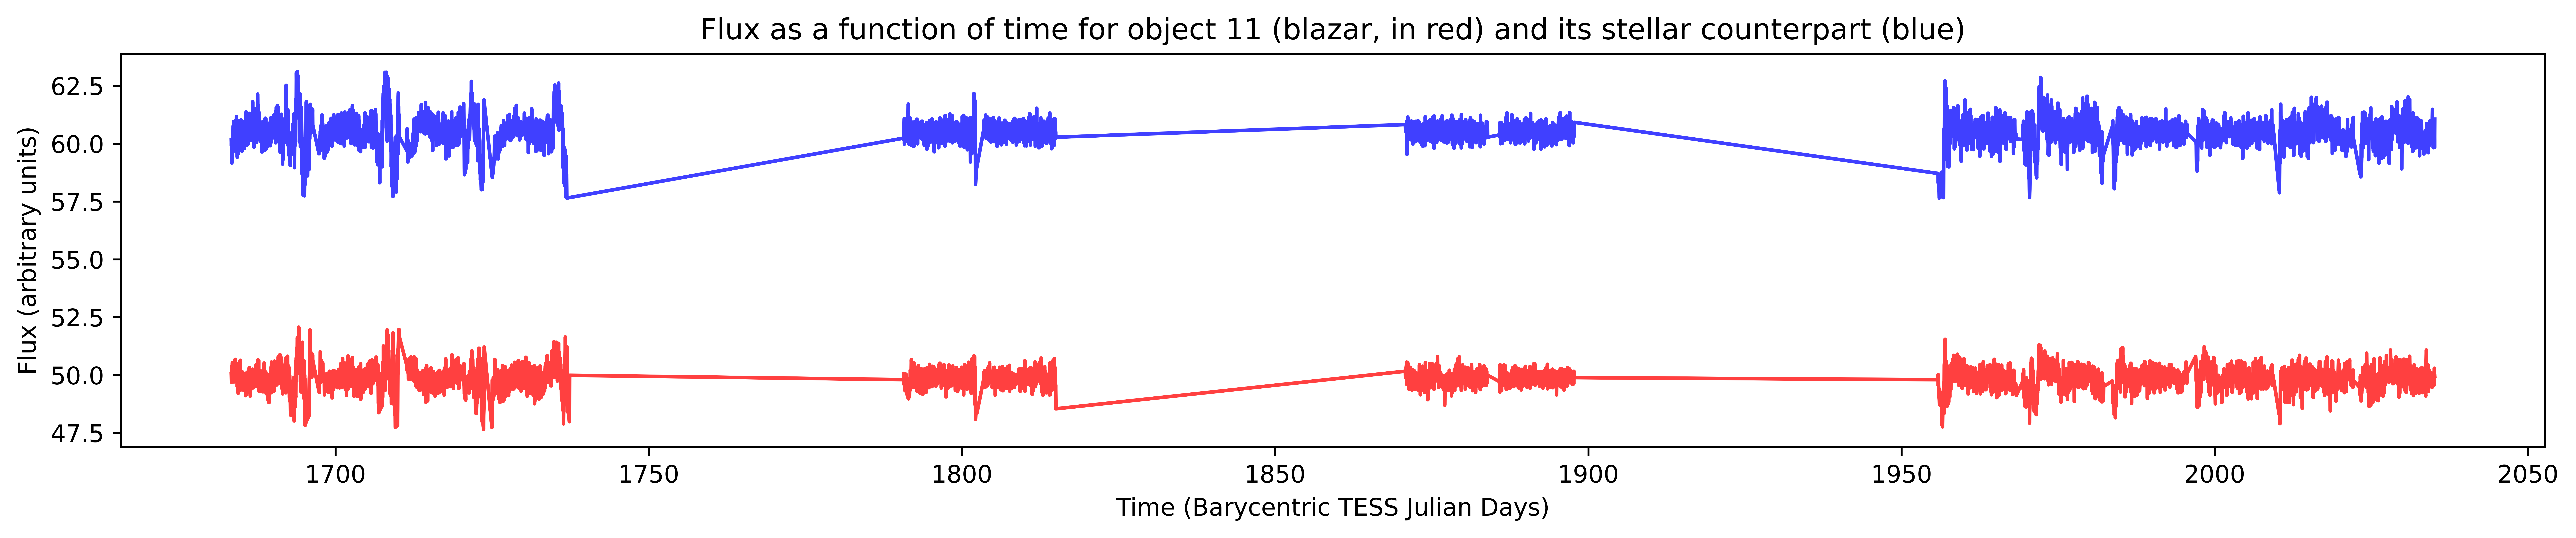

In [9]:
n = 11
file=lc_dir+'blazar/full/{}.pickle'.format(n)
file2=lc_dir+'star/full/{}.pickle'.format(n)
width=18
height=3
dpi=1000
alpha=0.75
save = False

plt.figure(figsize=(width, height), dpi=dpi)
with open(file,'rb') as rfile:
    lc = pickle.load(rfile)

lc = lc.remove_nans().remove_outliers()
plt.plot(lc.time,lc.flux + 30,color='red',alpha=alpha,label='TIC ' + str(lc.targetid))

with open(file2,'rb') as rfile:
    lc1 = pickle.load(rfile)
lc1 = lc1.remove_nans().remove_outliers()
plt.plot(lc1.time,lc1.flux,color='blue',alpha=alpha,label='TIC ' + str(lc1.targetid))

plt.xlabel("Time (Barycentric TESS Julian Days)")
plt.ylabel("Flux (arbitrary units)")
plt.title("Flux as a function of time for object 11 (blazar, in red) and its stellar counterpart (blue)")
if save == True:
    plt.savefig("E:/vis/"+str(n)+"lc.png")